In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 행동 인식: 분류 모델
# 1. features.txt : 컬럼명(피쳐) => 데이터프레임 생성
# \s: white space(공백,\n,\r,\t), + : 1개이상
feature_name_df = pd.read_csv(
    './human_activity/features.txt',
    sep ='\s+', # \s : 정규표현식
    header=None, # header 지정안하면 첫번째를 헤더로 써서 컬럼으로 써버림
                # 헤더가 0인 아니라 '없다'라고 지정하기
                # 결국, 혼란 없애기 위해서 컬럼명 주라구~~~
    names = ['column_index','column_name']  # 컬럼명 지정, 왠만하면 컬럼명 지정함
)

feature_name_df.head() # 만들었으니 확인해야함
                       # 인터넷에 있는 정보 만듦

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [ ]:
# unique : 중복이 뭐가 됬는지 알 수 없음, 왜냐 이미 제거해버려서
# 원래 중복된거 확인해야함
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count() # 그룹바이된 데이터프레임 나옴
feature_dup_df[feature_dup_df['column_index'] > 1] # True 만 추출함
feature_dup_df[feature_dup_df['column_index'] > 1].count() # 중복된 코드가 42개나 된다.
feature_dup_df[feature_dup_df['column_index']>1].head()# 어떤 컬림 중복됬는지 확인

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
feature_dup_df = pd.DataFrame(
    data= feature_name_df.groupby('column_name').cumcount(), 
    #cumcount()카운트를 세면서 누적을 하겠다. 그걸 그냥 data에 넣어버리겠다.
    columns = ['dup_cnt']    
)
feature_dup_df.head() # 중복이 안됬다, cnt =0 -> 중복이 0이다.
                      # 왜 0나옴? 이미 중복이 되버렸다. 카운트가 0 나옴
                      # groupby:중복된걸 하나로 묶었는데 그걸 제거하는 역할도 함
feature_dup_df.index                  

RangeIndex(start=0, stop=561, step=1)

In [39]:
# 중복된 피처명을 처리하는 함수, 계속 사용할꺼니까 / 중복된 컬럼명의 컬럼명 재지정 컬럼명_1, 컬럼명_2
def get_new_feature_name_df(old_feature_name_df): 
    #old_feature_name_df <= feature_name_df
    feature_dup_df = pd.DataFrame(
        data=old_feature_name_df.groupby('column_name').cumcount(),
        columns = ['dup_cnt']
    )
    # feature_dup_df reset_index : 인덱스를 컬럼으로 뺀 것이다. => merge
    feature_dup_df = feature_dup_df.reset_index() # index col
    new_feature_name_df = pd.merge(
        old_feature_name_df.reset_index(),
        feature_dup_df,
        how='outer' # 여기까지하면 merge됨   
    )
    # 중복 컬럼의 새로운 컬럼명 부여한 데이터 프레임 추출
    new_feature_name_df['column_name'] = \
        new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0] +'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    
    return new_feature_name_df
    
    # index 컬럼을 삭제
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)

In [40]:
# 데이터 로딩
# 이책 특징: 함수처리가 많다,,,쉽지 않다...어렵다 그래도 도움되니까 봐용
def get_human_dataset(): #return X_train,X_test,y_train,y_test
    feature_name_df = pd.read_csv( # 변수명에 진한표시되있는거 ->사용함,회색->사용X
        './human_activity/features.txt'
        , sep = '\s+'
        ,header = None
        ,names= ['column_index','column_name']
    )
    # 중복된 피쳐명을 수정하는 함수, 신규피처명 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    # 데이터프레임에서 피처명 추출
    # .tolist(): ndarray 로 나온걸 list 로 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    # 학습데이터, 데스트 데이터 => 데이터프레임으로 생성
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names = feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names = feature_name)
    # 레이블 처리
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    return X_train, X_test, y_train, y_test
    

In [41]:
# 데이터 로딩
# 여러파일을 하나로 합치는 작업, 또 합쳐진 데이터프레임들의 컬럼명을 어떻게 줄것인지도 중요

X_train, X_test,y_train, y_test = get_human_dataset()

C:\Users\TJ\AppData\Local\Temp\ipykernel_22360\2847338151.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0] +'_'+str(x[1]) if x[1]>0 else x[0], axis=1)


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 1 to 561
dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
# 레이블 뷸균형성 확인
 y_train['action'].value_counts() #완벽히 균형은 아니지만 그렇다고 쏠렸다고 볼수도X
 

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [48]:
# 다시한번 언급: 의사결정나무 안쓴다.
# 학습 및 평가까지
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 재현을 볼필요없다,정확도만 평가하면 된 다.

# 학습: 디폴트로 학습, 튜닝 X
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)

# 예측값 추출
pred = dt_clf.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test,pred)
print(f'정확도:{accuracy:.4f}') # 정확도:0.8548

정확도:0.8548


In [50]:
dt_clf.get_params() # 결과: 다 디폴트 값
                    # 정확도:0.8548 - 데이터 전처리 안하면 정확도가 0.85만됨

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 156,
 'splitter': 'best'}

In [53]:
# 하이퍼파라미터 튜닝 : max_depth(끝까지 가는거) , GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(
    df_clf,
    param_grid = params,
    scoring= 'accuracy',
    cv=5, # 모드가 5개 따로 만들어짐 -> 7*5 = 35개만들어짐
    verbose = 1 #실행과정을 상세 표시
)

# 여기까진 오브젝트 설정

grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,estimator,DecisionTreeC...dom_state=156)
,param_grid,"{'max_depth': [6, 8, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
print(f'베스트 정확도: {grid_cv.best_score_}')# grid 돌려도정확도 떨어짐
print(f'최적의 파라미터:{grid_cv.best_params_}')
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df # 데이터프레임으로 결과나옴
          # split0_test_score	split1_test_score	split2_test_score	split3_test_score	split4_test_score => CV가 5개라 5개 나옴
          # mean_test_score : 핵심, 평균스코어


베스트 정확도: 0.8512089975351118
최적의 파라미터:{'max_depth': 10}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.787637,0.017548,0.008000,0.000629,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,3
1,2.282457,0.049425,0.007805,0.000401,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,2
2,2.709595,0.060985,0.007400,0.000490,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,1
3,3.032803,0.147969,0.007801,0.000400,12,{'max_depth': 12},0.794697,0.811013,0.851020,0.878231,0.886395,0.844271,0.036158,7
4,3.389163,0.252429,0.008600,0.001021,16,{'max_depth': 16},0.801496,0.821210,0.850340,0.880272,0.897959,0.850255,0.035771,4
5,3.435633,0.333097,0.007605,0.000491,20,{'max_depth': 20},0.797417,0.821210,0.853741,0.879592,0.898639,0.850120,0.037012,5
6,3.416535,0.307965,0.007603,0.000491,24,{'max_depth': 24},0.792658,0.821210,0.853741,0.879592,0.898639,0.849168,0.038390,6


In [ ]:
result_df[['param_max_depth','mean_test_score']] 
# max_depth 마다의 평균 최고치 나옴

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844271
4,16,0.850255
5,20,0.850120
6,24,0.849168


In [ ]:
params = {
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split' : [8,16,24]
}
#like 보물찾기, 넓은범위 -> 줄여가기 ,결국 "하입포프" 사용

grid_cv = GridSearchCV(df_clf, param_grid=params, scoring='accuracy', cv=5,verbose=2)

grid_cv.fit(X_train,y_train)
print(f'최적정확도:{grid_cv.best_score_:.4f}')
print(f'최적 파라미터: {grid_cv.best_params_}') # -> 21*5 = 105번을 돌린다

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ...................max_depth=6, min_samples_split=8; total time=   1.7s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   1.7s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   1.7s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   1.7s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   1.7s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   1.7s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   1.7s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   1.7s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   1.7s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   1.7s
[CV] END ..................max_depth=6, min_samples_split=24; total time=   1.7s
[CV] END ..................max_depth=6, min_sam

In [78]:
# 일반화 성능 확인
best_dt_clf = grid_cv.best_estimator_ #best model

# 테스트 데이터로 예측값 추출
test_pred = best_dt_clf.predict(X_test)
acc = accuracy_score(y_test,test_pred)
print(f'텍스트 데이터에 정확도: {acc:4f}')

# 튜닝을 했더니 안한것보단 결과가 높아졌다.

텍스트 데이터에 정확도: 0.871734


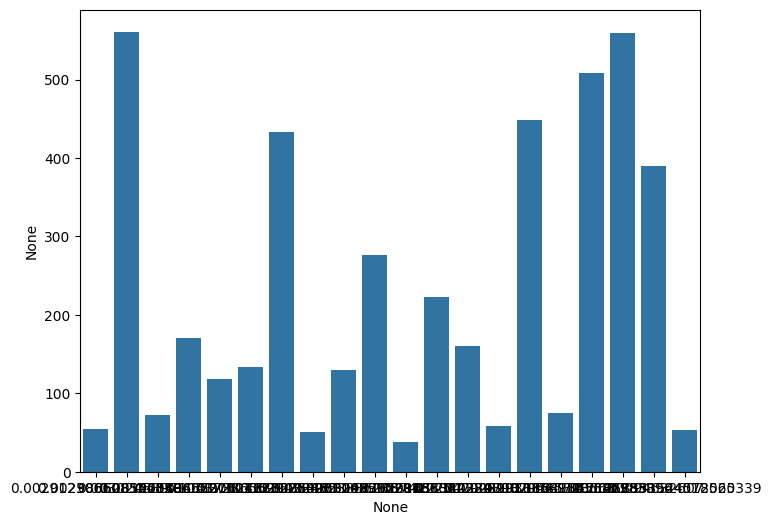

In [ ]:
# 트리계열 모델은 피처 중요도 추출
# 피처 중요도가 높은 20개 피처만 추출
ftr_importances_values = best_dt_clf.feature_importances_
# print(type(ftr_importances_values))
# Series 생성
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


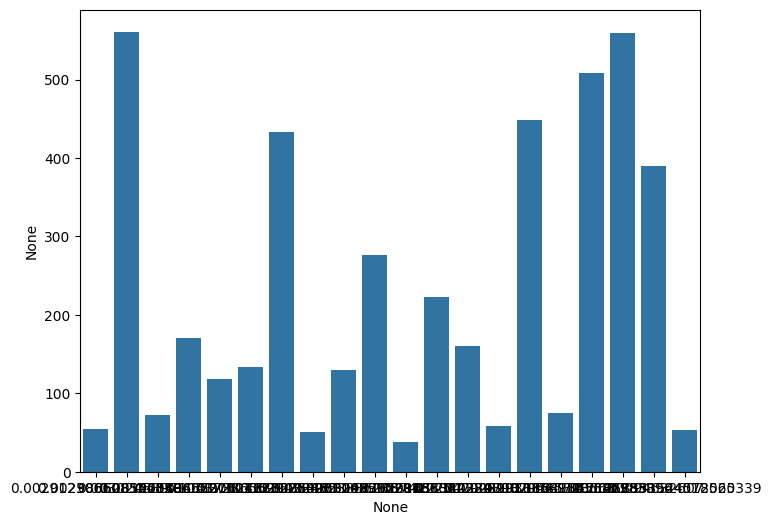

In [97]:

# 시각화
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(
    x=ftr_top20, 
    y=ftr_top20.index)
plt.show()



In [98]:
ftr_top20

53     0.253354
390    0.212584
560    0.139001
509    0.115478
75     0.101885
449    0.023971
58     0.020470
160    0.016513
223    0.015741
38     0.009972
276    0.008825
130    0.008550
51     0.006290
433    0.005247
133    0.004373
118    0.003967
170    0.003471
72     0.003025
561    0.002987
55     0.002912
dtype: float64

In [99]:
# 20개 피처명 추출
top20_columns = ftr_top20.index.tolist()
top20_columns

[53,
 390,
 560,
 509,
 75,
 449,
 58,
 160,
 223,
 38,
 276,
 130,
 51,
 433,
 133,
 118,
 170,
 72,
 561,
 55]

In [100]:
X_train[top20_columns].head()

,53,390,560,509,75,449,58,160,223,38,276,130,51,433,133,118,170,72,561,55
0,0.977436,-0.999982,0.179941,-0.998285,0.995675,-1.0,-0.970905,0.301099,-0.173179,0.376314,-0.983163,-0.867044,-0.161265,-0.980498,0.847308,-0.385300,-0.990156,-0.712372,-0.058627,0.056483
1,0.984520,-0.999987,0.180289,-0.999472,0.834271,-1.0,-0.970583,0.169395,0.081569,-0.013429,-0.973770,-0.864904,-0.161343,-0.987354,0.833721,-0.208772,-0.991947,-0.105568,-0.054317,0.102764
2,0.986770,-0.999963,0.180637,-0.999807,0.714392,-1.0,-0.970368,-0.350646,0.038049,-0.124698,-0.963072,-0.864904,-0.163711,-0.972901,0.833721,-0.120105,-0.993359,-0.254490,-0.049118,0.102764
3,0.986821,-0.999978,0.181935,-0.999770,0.386373,-1.0,-0.969400,-0.725301,-0.092856,-0.305693,-0.987275,-0.885320,-0.163711,-0.994518,0.834164,-0.127495,-0.993676,-0.206281,-0.047663,0.095753
4,0.987434,-0.999988,0.185151,-0.999873,0.239268,-1.0,-0.967051,-0.724558,0.180441,-0.155804,-0.980848,-0.870154,-0.166786,-0.987950,0.839091,-0.272884,-0.979846,-0.066327,-0.043892,0.094059


In [103]:
X_train_top20 = X_train[top20_columns]
X_test_top20 = X_test[top20_columns]

In [105]:
params = {
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split' : [8,16,24]
}
#like 보물찾기, 넓은범위 -> 줄여가기 ,결국 "하입포프" 사용

grid_cv = GridSearchCV(df_clf, param_grid=params, scoring='accuracy', cv=5,verbose=2)

grid_cv.fit(X_train_top20,y_train)
print(f'최적정확도:{grid_cv.best_score_:.4f}')
print(f'최적 파라미터: {grid_cv.best_params_}') # -> 21*5 = 105

# 결과: 0.8940 , 정확도 오름->많이오름


Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] END ...................max_depth=6, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=8; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=16; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=24; total time=   0.0s
[CV] END ..................max_depth=6, min_sam

In [ ]:
# 일반화 성능
best_dt_clf = grid_cv.best_estimator_
test_pred = best_dt_clf.predict(X_test_top20)

acc = accuracy_score(y_test,test_pred)
print(f'테스트 데이터 정확도: {acc:.4f}')
# 오히려 떨어짐...이게 일반적인 거임
# 결론) 학습데이터의 정확도를 보면 안됨 그거 믿으면 안됨

테스트 데이터 정확도: 0.8666
